In [2]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 9.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [4]:
macbook_air=[]

In [18]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac   

In [19]:
macbook_air

["\nGot it for 80K in last sale after all discounts combined. Received securely packed, and brand new no issues there. Here are some pros and cons you may want to consider:1. Wonderful battery life: Most amazing feature of this laptop - can take it outdoors, with full screen brightness, and heavy workload (heavy programs running with 7GB / 8GB RAM used), it gives 8-10 hours or even more (haven't tried sitting all day outdoors).2. Great screen: Better than my Mi notebook pro, that too has good screen, but this one is brighter and crispier and the difference is well noted in bright sunlight.3. RAM management: I run chrome with 8-10 tabs open, heavy programs running that takes 14GB / 16GB RAM in my Mi notebok pro, this one manages it with 7GB / 8GB RAM. That's all. I felt some lag opening photoshop, 2-3 seconds delay clicking open button and actually opening of photoshop application, but I don't mind it. Comparing processing with my Mi notebook pro i5 with 16 GB RAM, this one is comparabl

In [20]:
len(macbook_air)

10

In [21]:
rev={"review":macbook_air}

In [22]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [23]:
review_data

,review
0,"\nGot it for 80K in last sale after all discounts combined. Received securely packed, and brand new no issues there. Here are some pros and cons you may want to consider:1. Wonderful battery life: Most amazing feature of this laptop - can take it outdoors, with full screen brightness, and heavy workload (heavy programs running with 7GB / 8GB RAM used), it gives 8-10 hours or even more (haven't tried sitting all day outdoors).2. Great screen: Better than my Mi notebook pro, that too has good screen, but this one is brighter and crispier and the difference is well noted in bright sunlight.3. RAM management: I run chrome with 8-10 tabs open, heavy programs running that takes 14GB / 16GB RAM in my Mi notebok pro, this one manages it with 7GB / 8GB RAM. That's all. I felt some lag opening p..."
1,\nThis is my first MacBook. And I love using it. Quality is absolutely perfect to meet all of the requirements such as coding and video editing.Although MacBook is very good but it has only one drawback that is it has 256gb of storage memory which is very less as compared to windows laptops.Performance wise it has no lag at all.❤️ MacBook Air M1❤️\n
2,
3,\nNice\n
4,\nI used MacBook Pro 13 inch of intel but this M1 chip from Air is too fast and quick response with better battery life.\n
5,"\nThis is my second Macbook Air purchase. So far, I'm loving it.\n"
6,\ni was using macbook air early 2015 before. It was performing ok since i purchased until 2022. But i started facing unexpected shutdown due to poor battery condition. hence i upgraded to M1 Mac in exchange offer. I got around 18k exchange value which was surprising for me.After i started using this i fell in love with this due to following pros1. Excellent battery life (mora than 12 hours continues usage)2. Excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. Excellent display qualityI did not feel any cons during my usage on past 6 months. Only concern is screen is ultra-fingerprint magnet. You need a cleaning cloth always with you which I am carrying with me all the time with IPA liquid for better cleaning performance. But i ...
7,\nGiving 5 star for its performance\n
8,\nValue for money ! Very Good performing machine\n
9,"\nMacBook Air is one of favourite from 2017 classy to handle, classic battery life very easy and convenient to use, 100% recommended.\n"


In [24]:
text=" ".join(review_data)

In [25]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [26]:
review_data

,review
0,"\ngot it for 80k in last sale after all discounts combined. received securely packed, and brand new no issues there. here are some pros and cons you may want to consider:1. wonderful battery life: most amazing feature of this laptop - can take it outdoors, with full screen brightness, and heavy workload (heavy programs running with 7gb / 8gb ram used), it gives 8-10 hours or even more (haven't tried sitting all day outdoors).2. great screen: better than my mi notebook pro, that too has good screen, but this one is brighter and crispier and the difference is well noted in bright sunlight.3. ram management: i run chrome with 8-10 tabs open, heavy programs running that takes 14gb / 16gb ram in my mi notebok pro, this one manages it with 7gb / 8gb ram. that's all. i felt some lag opening p..."
1,\nthis is my first macbook. and i love using it. quality is absolutely perfect to meet all of the requirements such as coding and video editing.although macbook is very good but it has only one drawback that is it has 256gb of storage memory which is very less as compared to windows laptops.performance wise it has no lag at all.❤️ macbook air m1❤️\n
2,
3,\nnice\n
4,\ni used macbook pro 13 inch of intel but this m1 chip from air is too fast and quick response with better battery life.\n
5,"\nthis is my second macbook air purchase. so far, i'm loving it.\n"
6,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...
7,\ngiving 5 star for its performance\n
8,\nvalue for money ! very good performing machine\n
9,"\nmacbook air is one of favourite from 2017 classy to handle, classic battery life very easy and convenient to use, 100% recommended.\n"


In [27]:
text=" ".join(review_data["review"])
text

"\ngot it for 80k in last sale after all discounts combined. received securely packed, and brand new no issues there. here are some pros and cons you may want to consider:1. wonderful battery life: most amazing feature of this laptop - can take it outdoors, with full screen brightness, and heavy workload (heavy programs running with 7gb / 8gb ram used), it gives 8-10 hours or even more (haven't tried sitting all day outdoors).2. great screen: better than my mi notebook pro, that too has good screen, but this one is brighter and crispier and the difference is well noted in bright sunlight.3. ram management: i run chrome with 8-10 tabs open, heavy programs running that takes 14gb / 16gb ram in my mi notebok pro, this one manages it with 7gb / 8gb ram. that's all. i felt some lag opening photoshop, 2-3 seconds delay clicking open button and actually opening of photoshop application, but i don't mind it. comparing processing with my mi notebook pro i5 with 16 gb ram, this one is comparable

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
text_tokens = word_tokenize(text)
text_tokens

['got',
 'it',
 'for',
 '80k',
 'in',
 'last',
 'sale',
 'after',
 'all',
 'discounts',
 'combined',
 '.',
 'received',
 'securely',
 'packed',
 ',',
 'and',
 'brand',
 'new',
 'no',
 'issues',
 'there',
 '.',
 'here',
 'are',
 'some',
 'pros',
 'and',
 'cons',
 'you',
 'may',
 'want',
 'to',
 'consider:1.',
 'wonderful',
 'battery',
 'life',
 ':',
 'most',
 'amazing',
 'feature',
 'of',
 'this',
 'laptop',
 '-',
 'can',
 'take',
 'it',
 'outdoors',
 ',',
 'with',
 'full',
 'screen',
 'brightness',
 ',',
 'and',
 'heavy',
 'workload',
 '(',
 'heavy',
 'programs',
 'running',
 'with',
 '7gb',
 '/',
 '8gb',
 'ram',
 'used',
 ')',
 ',',
 'it',
 'gives',
 '8-10',
 'hours',
 'or',
 'even',
 'more',
 '(',
 'have',
 "n't",
 'tried',
 'sitting',
 'all',
 'day',
 'outdoors',
 ')',
 '.2.',
 'great',
 'screen',
 ':',
 'better',
 'than',
 'my',
 'mi',
 'notebook',
 'pro',
 ',',
 'that',
 'too',
 'has',
 'good',
 'screen',
 ',',
 'but',
 'this',
 'one',
 'is',
 'brighter',
 'and',
 'crispier',
 'an

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]
tf=TfidfVectorizer()
text_tf=tf.fit_transform(text_without_sw)

In [35]:
feature_names_out=tf.get_feature_names_out()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names_out)
df

,10,100,1000,12,13,14gb,16,16gb,18k,200,...,vetro,video,void,warranty,weight,windows,wise,wonderful,workload,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


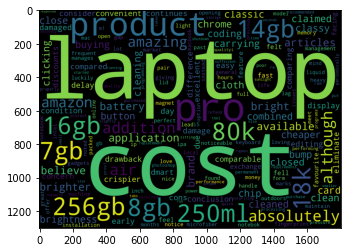

In [36]:
words_list=" ".join(df)
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [37]:
with open ('/content/positive-words.txt',"r") as pw:
    positive_words=pw.read().split("/n")

In [38]:
positive_words=positive_words[35:]

In [40]:
with open ('/content/negative-words.txt',"r",encoding='Latin-1') as nw:
    negative_words=nw.read().split("/n")

In [41]:
negative_words=negative_words[35:]    

In [42]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [43]:
pos_text=" ".join([word for word in df if not word  in positive_words])

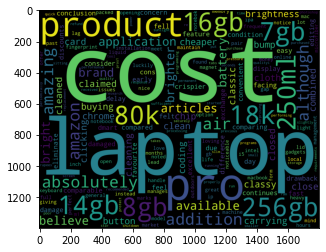

In [44]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

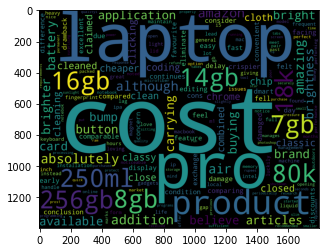

In [45]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [46]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"\ngot it for 80k in last sale after all discounts combined. received securely packed, and brand new no issues there. here are some pros and cons you may want to consider:1. wonderful battery life: most amazing feature of this laptop - can take it outdoors, with full screen brightness, and heavy workload (heavy programs running with 7gb / 8gb ram used), it gives 8-10 hours or even more (haven't tried sitting all day outdoors).2. great screen: better than my mi notebook pro, that too has good screen, but this one is brighter and crispier and the difference is well noted in bright sunlight.3. ram management: i run chrome with 8-10 tabs open, heavy programs running that takes 14gb / 16gb ram in my mi notebok pro, this one manages it with 7gb / 8gb ram. that's all. i felt some lag opening p...",0.548629,0.287446
1,\nthis is my first macbook. and i love using it. quality is absolutely perfect to meet all of the requirements such as coding and video editing.although macbook is very good but it has only one drawback that is it has 256gb of storage memory which is very less as compared to windows laptops.performance wise it has no lag at all.❤️ macbook air m1❤️\n,0.650000,0.392917
2,,0.000000,0.000000
3,\nnice\n,1.000000,0.600000
4,\ni used macbook pro 13 inch of intel but this m1 chip from air is too fast and quick response with better battery life.\n,0.533333,0.344444
5,"\nthis is my second macbook air purchase. so far, i'm loving it.\n",0.650000,0.233333
6,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716
7,\ngiving 5 star for its performance\n,0.000000,0.000000
8,\nvalue for money ! very good performing machine\n,0.780000,0.910000
9,"\nmacbook air is one of favourite from 2017 classy to handle, classic battery life very easy and convenient to use, 100% recommended.\n",0.688889,0.276667


In [47]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"\ngot it for 80k in last sale after all discounts combined. received securely packed, and brand new no issues there. here are some pros and cons you may want to consider:1. wonderful battery life: most amazing feature of this laptop - can take it outdoors, with full screen brightness, and heavy workload (heavy programs running with 7gb / 8gb ram used), it gives 8-10 hours or even more (haven't tried sitting all day outdoors).2. great screen: better than my mi notebook pro, that too has good screen, but this one is brighter and crispier and the difference is well noted in bright sunlight.3. ram management: i run chrome with 8-10 tabs open, heavy programs running that takes 14gb / 16gb ram in my mi notebok pro, this one manages it with 7gb / 8gb ram. that's all. i felt some lag opening p...",0.548629,0.287446,Positive
1,\nthis is my first macbook. and i love using it. quality is absolutely perfect to meet all of the requirements such as coding and video editing.although macbook is very good but it has only one drawback that is it has 256gb of storage memory which is very less as compared to windows laptops.performance wise it has no lag at all.❤️ macbook air m1❤️\n,0.650000,0.392917,Positive
2,,0.000000,0.000000,Neutral
3,\nnice\n,1.000000,0.600000,Positive
4,\ni used macbook pro 13 inch of intel but this m1 chip from air is too fast and quick response with better battery life.\n,0.533333,0.344444,Positive
5,"\nthis is my second macbook air purchase. so far, i'm loving it.\n",0.650000,0.233333,Positive
6,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716,Positive
7,\ngiving 5 star for its performance\n,0.000000,0.000000,Neutral
8,\nvalue for money ! very good performing machine\n,0.780000,0.910000,Positive
9,"\nmacbook air is one of favourite from 2017 classy to handle, classic battery life very easy and convenient to use, 100% recommended.\n",0.688889,0.276667,Positive


In [48]:
review_data['analysis'].value_counts()

Positive    8
Neutral     2
Name: analysis, dtype: int64

In [49]:
#positive comments
((228+33)/280)*100

93.21428571428572

In [50]:
#negative comments
(19/199)*100

9.547738693467336

So in this review data only 9% is about the negative comments so the macbook air product Received good product reviews from users